In [1]:
import lmdb
import proto.example1_pb2 as example_pb2
import matplotlib.pyplot as plt
import numpy as np
# %pylab inline

In [2]:
path_to_lmdb_dir = './data1/train.lmdb'
reader = lmdb.open(path_to_lmdb_dir)
txn = reader.begin()
cursor = txn.cursor()

In [3]:
cursor.next()
key, value = cursor.item()
example = example_pb2.Example()
example.ParseFromString(value)
print('key:', key.decode())

key: 00000001


In [4]:
image = np.frombuffer(example.image, dtype=np.uint8)
length = example.length
digits = example.digits

length:2, digits:[1, 6]


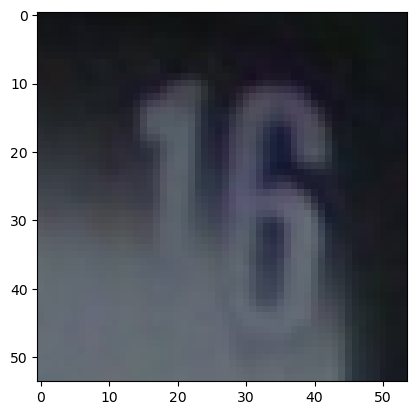

In [5]:
# print('length: %d, digits: %d,%d,%d,%d,%d' % (
#     length, digits[0], digits[1], digits[2], digits[3], digits[4]))

print(f"length:{length}, digits:{digits}")

plt.imshow(image.reshape([54, 54, 3]))

In [6]:
cursor.close()
reader.close()